# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))




## <font color='red' size=5> Implementing Logistic Regression with L2 regularization Using SGD: without using sklearn </font>




<br>
Algorithm

* Initialize the weight_vector and intercept term to zeros </font>

* Create a loss function 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keeping batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector
        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights 
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initializing weights </font>

In [6]:
from numpy import zeros_like
def initialize_weights(row_vector):
    ''' initializing our weights and bias'''
    w=zeros_like(row_vector)
    b=0
    return w,b

In [7]:
initialize_weights(X[0])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0)

In [8]:
X[0].shape

(15,)

In [9]:
dim=X_train[0] 
w,b = initialize_weights(X[0])
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='blue'>Computing sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [10]:
from math import *
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and returnz
    return 1/(1+np.exp(-z))

<font color='blue'> Computing loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [11]:
def logloss(y_true,y_pred):
    loss=-1*np.mean(y_true*np.log10(y_pred)+(1-y_true)*np.log10(1-y_pred))
    return loss

<font color='blue'>Computing gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [12]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw=x*(y-sigmoid(np.dot(w,x)+b))-(alpha/N)*w
    return dw

<font color='blue'>Computing gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [13]:
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db=y-sigmoid(np.dot(w,x)+b)
     return db

In [14]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

In [15]:
from tqdm.notebook import tqdm

<font color='blue'> Implementing logistic regression</font>

In [16]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' implementing logistic regression from scratch'''
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    #write your code to perform SGD
    for i in tqdm(range(epochs)):
      for k,j in zip(X_train,y_train):
        dw=gradient_dw(k,j,w,b,alpha,1)
        db=gradient_db(k,j,w,b)
        w=w+eta0*dw
        b=b+eta0*db
      #print(w,b)
      #print(dw,db)
      predicted_train=pred(w,b,X_train)
      train_loss.append(logloss(y_train,predicted_train))
      predicted_test=pred(w,b,X_test)
      #print(predicted_test,y_test)
      test_loss.append(logloss(y_test,predicted_test))
      print("epochs {}".format(i))
      print("train loss {}".format(train_loss[i]))
      print("test loss {}".format(test_loss[i]))
    return w,b,train_loss,test_loss

In [17]:
alpha=0.001
eta0=0.001
N=len(X_train)
epochs=10
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

  0%|          | 0/10 [00:00<?, ?it/s]

epochs 0
train loss 0.16508582909709507
test loss 0.16616609041599303
epochs 1
train loss 0.16506219715226675
test loss 0.16613687944022942
epochs 2
train loss 0.1650626204724662
test loss 0.1661369826890975
epochs 3
train loss 0.1650626532171315
test loss 0.1661369961684692
epochs 4
train loss 0.165062655254186
test loss 0.16613699702404586
epochs 5
train loss 0.16506265537944248
test loss 0.16613699707671928
epochs 6
train loss 0.16506265538713893
test loss 0.16613699707995605
epochs 7
train loss 0.1650626553876119
test loss 0.16613699708015497
epochs 8
train loss 0.16506265538764092
test loss 0.16613699708016713
epochs 9
train loss 0.1650626553876427
test loss 0.16613699708016788


In [18]:
#value of weights w and bias b
print(w)
print(b)

[-0.41143756  0.1913536  -0.14834881  0.32432742 -0.22295579  0.58274586
 -0.42548225 -0.09976555  0.21372059  0.15398406  0.17752567 -0.01315215
 -0.06438781  0.36130797 -0.00957985]
-0.9000008692366803


<font color='blue'>Ploting train and test loss vs epochs </font>


In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

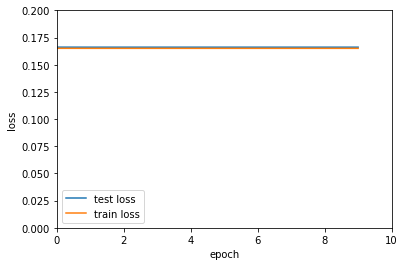

In [21]:
plt.plot(list(range(epochs)),test_loss,label='test loss')
plt.plot(list(range(epochs)),train_loss,label='train loss')
plt.legend()
plt.xlim(0,10)
plt.ylim(0,0.2)
plt.xlabel('epoch')
plt.ylabel('loss')